# Reducing Gun Deaths (FiveThirtyEight)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from plotnine import *

In [2]:
# Read in data

deaths = pd.read_csv('gun_death_data.csv').dropna()

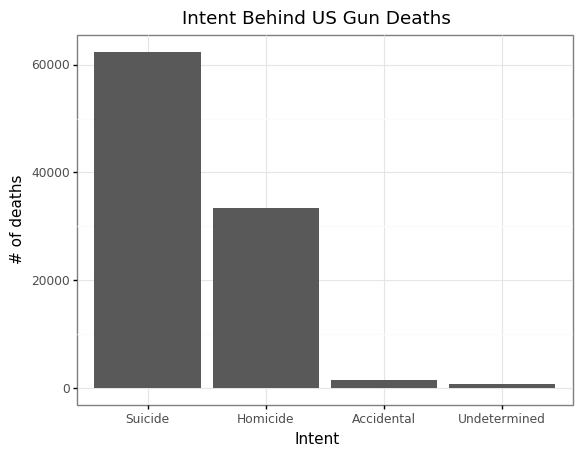

<ggplot: (296727258)>

In [40]:
(ggplot(deaths, aes(x='intent')) + 
 geom_bar() +
 scale_x_discrete(limits=['Suicide', 'Homicide', 'Accidental', 'Undetermined']) + 
 labs(title = "Intent Behind US Gun Deaths",
       y = "# of deaths",
       x = "Intent") +
 theme_bw())

The visualisation above summarizes to intent behind gun deaths in the United States from 2012 to 2014. The amount of deaths by suicide compared to homicide is a startling measure of the mental health in America. Also, the fact that so many more gun death involved men than women given valuable insight on which demographic needs intervention the most.

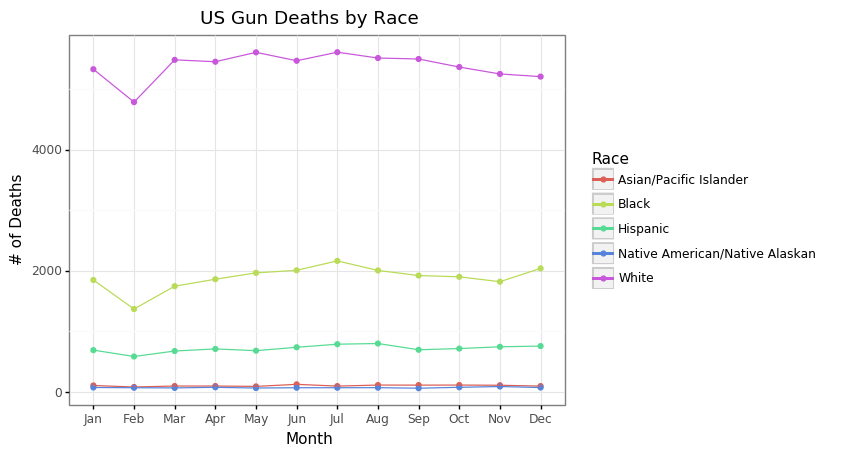

<ggplot: (299360099)>

In [41]:
grouped_by_race_month = deaths.groupby(['race','month']).count().reset_index()
months = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
          7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
grouped_by_race_month['month_abbr'] = grouped_by_race_month['month'].apply(lambda x: months[x])

(ggplot(grouped_by_race_month, aes(    x='month_abbr', 
                                       y='year', 
                                   color='race',
                                   group='race')) + 
 geom_point() + 
 geom_line() + 
 scale_x_discrete(limits=list(months.values())) +
 labs(title="US Gun Deaths by Race",
          y="# of Deaths",
          x="Month",
      color="Race") +
 theme_bw())

This graphic shows the number of gun deaths by month grouped by the race of the deceased. The most interesting feature is, of course, the pronounced decrease in guns deaths in the spring. This seems to be consistent across all races for which we have significant data. Based off this data, it would seem important to reach out to at-risk demographics during the transition from spring to summer.

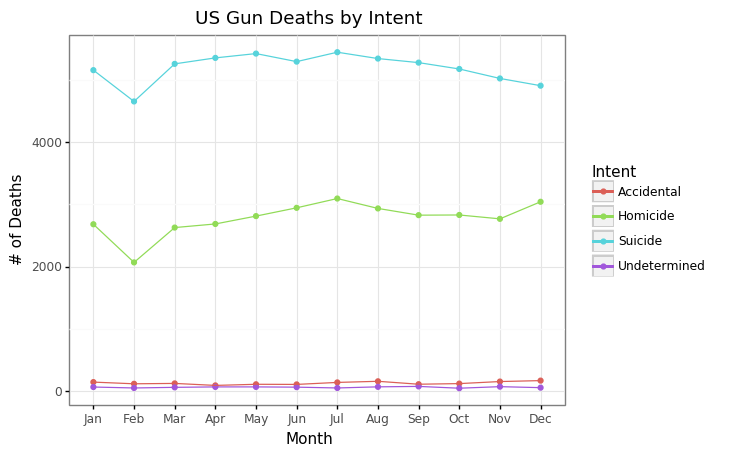

<ggplot: (303743843)>

In [45]:
grouped_by_intent_month = deaths.groupby(['intent', 'month']).count().reset_index()

grouped_by_intent_month['month_abbr'] = grouped_by_intent_month['month'].apply(lambda x: months[x])

(ggplot(grouped_by_intent_month, aes(    x='month_abbr', 
                                         y='year', 
                                     color='intent',
                                    group='intent')) + 
 geom_point() + 
 geom_line() + 
 scale_x_discrete(limits=list(months.values())) +
 labs(title="US Gun Deaths by Intent",
          y="# of Deaths",
          x="Month",
      color="Intent") +
 theme_bw())

Just as when we grouped by race, this graphic shows that both major intents behind gun death (Suicide and Homicide) decrease significantly in the spring. However, it seems that the trends in intent across the months tend to follow each other more loosely that the trends between races did.